In [326]:
#import packages
from __future__ import division 
import sys
import pandas as pd
import numpy as np
import scipy
from numpy import mean, std, cov 
from numpy.random import seed, randn
import matplotlib.pyplot as plt
from matplotlib import pyplot
from math import sqrt
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev

In [327]:
### pilot data + new data

In [328]:
#import excel file containing data summary

wtpdata = pd.read_csv(r'wtp_task_data_new.csv', encoding='utf-8-sig')
#wtpdata = pd.read_excel(r'wtp_taskdata_NEW.xlsx')
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(wtpdata)



                 prolific_id  avg_spent_social  avg_spent_nonsocial  \
0   549ea92efdf99b4ffa5fa208          0.032000             0.030333   
1   55a43687fdf99b7da1908e0f          0.018846             0.018333   
2   55ea70c37480920010aa9982          0.031000             0.029250   
3   566c9284d408ea000519c6d7          0.018846             0.017917   
4   56f745653bd969000d170c15          0.034000             0.028621   
5   57e972d7c3e5930001447bb1          0.030645             0.027368   
6   58ab75c4ef58a9000119d16c          0.024118             0.022500   
7   5c510d1310223b00012fa23e          0.028919             0.024615   
8   5cb33d40f173240019513957          0.022692             0.020000   
9   5cc166b25899270017dd60e2          0.032727             0.028571   
10  5cfecc1e96681500168a1799          0.038696             0.036667   
11  5d305152b2cfe00019231a2a          0.029600             0.025600   
12  5da23c68cf775d001724d361          0.016818             0.019286   
13  5d

In [329]:
wtpdata['avg_spent_social'] = wtpdata['avg_spent_social'].astype(float)
wtpdata['avg_spent_nonsocial'] = wtpdata['avg_spent_nonsocial'].astype(float)
wtpdata.applymap(type)

,prolific_id,avg_spent_social,avg_spent_nonsocial,prop_social,AQ,MSPSS
0,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
1,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
2,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
3,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
4,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
5,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
6,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
7,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
8,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
9,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>


In [330]:
wtpdata['avg_spent_social'] = wtpdata['avg_spent_social'].astype(float)
wtpdata['avg_spent_nonsocial'] = wtpdata['avg_spent_nonsocial'].astype(float)
wtpdata.applymap(type)

,prolific_id,avg_spent_social,avg_spent_nonsocial,prop_social,AQ,MSPSS
0,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
1,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
2,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
3,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
4,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
5,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
6,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
7,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
8,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
9,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>


In [331]:
socialavg= wtpdata.avg_spent_social
#calculate group mean for av spent on social experiences
social_M = mean(socialavg)
print('group mean: %.12f'% (social_M))
print('standard error of the mean: %.12f'% (sem(socialavg)))


group mean: 0.030264072464
standard error of the mean: 0.000749028991


In [332]:

nonsocialavg = wtpdata.avg_spent_nonsocial
#calculate group mean for av spent on non-social experiences


nonsocial_M = mean(nonsocialavg)
print('group mean: %.12f'% (nonsocial_M))
print('standard error of the mean: %.12f'% (sem(nonsocialavg)))




group mean: 0.027760710145
standard error of the mean: 0.000654537611


In [333]:
#sample size
n = len(wtpdata)
print(n)

69


In [334]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(socialavg[i]-nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialavg[i]-nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.0010247253060000005 0.17273200000000002
0.0029513569310474137


In [335]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.00035530162190474063


In [336]:
# calculate the t statistic
t_stat = (social_M - nonsocial_M) / sed
print(t_stat)

7.045738506399933


In [337]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

68


In [338]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')


t=7.046, df=68, cv=1.668, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


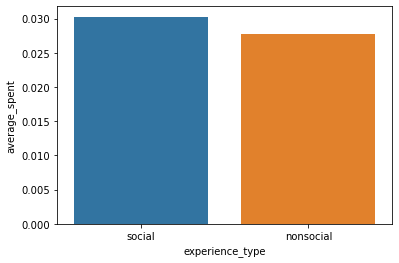

In [339]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'average_spent': [social_M, nonsocial_M]})

wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.average_spent, data=wtp_means)

In [340]:
#calculate effect size- cohens d

cohens_d = (mean(socialavg) - mean(nonsocialavg)) / (sqrt((stdev(socialavg) ** 2 + stdev(nonsocialavg) ** 2) / 2))

print(cohens_d)

0.42846384755439415


In [341]:
prop_social = wtpdata['prop_social']
aq = wtpdata.AQ #autism quotient
mspss = wtpdata.MSPSS #perceived social support

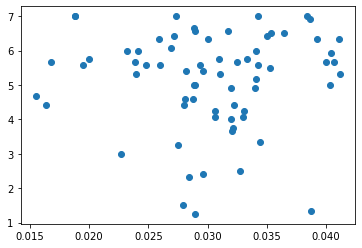

[[3.87120657e-05 1.68153737e-04]
 [1.68153737e-04 1.99328052e+00]]
Pearsons correlation: 0.019
p value: 0.8759
Accept null hypothesis that the means are equal.


In [342]:
#amount spent on social / mulitdimensional scale of perceived social support
pyplot.scatter(socialavg, mspss)
pyplot.show()
covariance = cov(socialavg, mspss)
print(covariance)
corr, _ = pearsonr(socialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

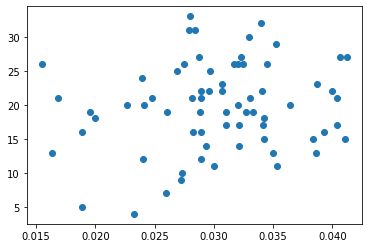

[[3.87120657e-05 6.54224084e-03]
 [6.54224084e-03 4.14965899e+01]]
Pearsons correlation: 0.163
p value: 0.1802
Accept null hypothesis that the means are equal.


In [344]:
#amount spent on social / aq
pyplot.scatter(socialavg, aq)
pyplot.show()
covariance = cov(socialavg, aq)
print(covariance)
corr, _ = pearsonr(socialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [345]:
##### prop of chosen social // self report #####

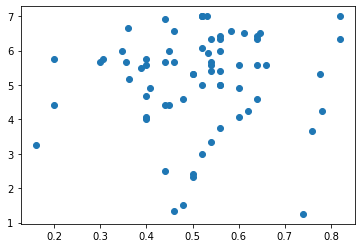

[[0.0184229  0.01233861]
 [0.01233861 1.99328052]]
Pearsons correlation: 0.064
p value: 0.5992
Accept null hypothesis that the means are equal.


In [346]:
#prop of chosen social // MSPSS
pyplot.scatter(prop_social, mspss)
pyplot.show()
covariance = cov(prop_social, mspss)
print(covariance)
corr, _ = pearsonr(prop_social, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

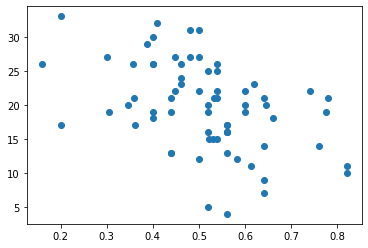

[[ 1.84228964e-02 -3.89459719e-01]
 [-3.89459719e-01  4.14965899e+01]]
Pearsons correlation: -0.445
p value: 0.0001
Reject the null hypothesis that the means are equal.


In [347]:
# prop social // aq
pyplot.scatter(prop_social, aq)
pyplot.show()
covariance = cov(prop_social, aq)
print(covariance)
corr, _ = pearsonr(prop_social, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, aq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [348]:
##### avg spent on nonsocial // self report #####

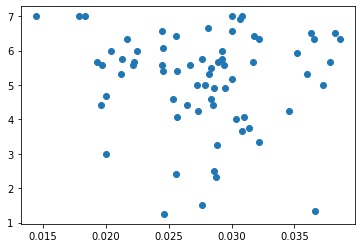

[[ 2.95609444e-05 -5.60012006e-04]
 [-5.60012006e-04  1.99328052e+00]]
Pearsons correlation: -0.073
p value: 0.5514
Accept null hypothesis that the means are equal.


In [349]:
# nonsocial // mspss (social support)
pyplot.scatter(nonsocialavg, mspss)
pyplot.show()
covariance = cov(nonsocialavg, mspss)
print(covariance)
corr, _ = pearsonr(nonsocialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

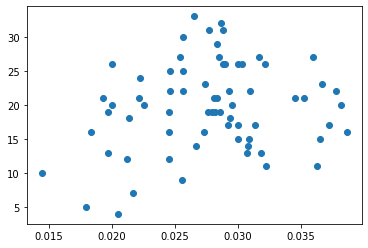

[[2.95609444e-05 6.59272783e-03]
 [6.59272783e-03 4.14965899e+01]]
Pearsons correlation: 0.188
p value: 0.1214
Accept null hypothesis that the means are equal.


In [350]:
# nonsocial // aq
pyplot.scatter(nonsocialavg, aq)
pyplot.show()
covariance = cov(nonsocialavg, aq)
print(covariance)
corr, _ = pearsonr(nonsocialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [351]:
######################################################################################################################

In [279]:
######################################################################################################################

In [280]:
## now including joanne's old data

In [352]:
wtpdata = pd.read_csv(r'wtp_subs_list_all.csv', encoding='utf-8-sig')
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(wtpdata)



                  prolific_id  avg_spent_social  avg_spent_nonsocial  \
0    549ea92efdf99b4ffa5fa208          0.032000             0.030333   
1    55a43687fdf99b7da1908e0f          0.018846             0.018333   
2    55ea70c37480920010aa9982          0.031000             0.029250   
3    566c9284d408ea000519c6d7          0.018846             0.017917   
4    56f745653bd969000d170c15          0.034000             0.028621   
5    57e972d7c3e5930001447bb1          0.030645             0.027368   
6    58ab75c4ef58a9000119d16c          0.024118             0.022500   
7    5c510d1310223b00012fa23e          0.028919             0.024615   
8    5cb33d40f173240019513957          0.022692             0.020000   
9    5cc166b25899270017dd60e2          0.032727             0.028571   
10   5cfecc1e96681500168a1799          0.038696             0.036667   
11   5d305152b2cfe00019231a2a          0.029600             0.025600   
12   5da23c68cf775d001724d361          0.016818             0.01

In [353]:
wtpdata['avg_spent_social'] = wtpdata['avg_spent_social'].astype(float)
wtpdata['avg_spent_nonsocial'] = wtpdata['avg_spent_nonsocial'].astype(float)
wtpdata.applymap(type)

,prolific_id,avg_spent_social,avg_spent_nonsocial,prop_social,AQ,MSPSS,Unnamed: 6
0,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>,<class 'float'>
1,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>,<class 'float'>
2,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>,<class 'float'>
3,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>,<class 'float'>
4,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>,<class 'float'>
5,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>,<class 'float'>
6,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>,<class 'float'>
7,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>,<class 'float'>
8,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>,<class 'float'>
9,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>,<class 'float'>


In [354]:
socialavg= wtpdata.avg_spent_social
#calculate group mean for av spent on social experiences
social_M = mean(socialavg)
print('group mean: %.12f'% (social_M))
print('standard error of the mean: %.12f'% (sem(socialavg)))


group mean: 0.029464702970
standard error of the mean: 0.000584604554


In [355]:

nonsocialavg = wtpdata.avg_spent_nonsocial
#calculate group mean for av spent on non-social experiences


nonsocial_M = mean(nonsocialavg)
print('group mean: %.12f'% (nonsocial_M))
print('standard error of the mean: %.12f'% (sem(nonsocialavg)))




group mean: 0.027084009901
standard error of the mean: 0.000515251931


In [356]:
#sample size
n = len(wtpdata)
print(n)

101


In [357]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(socialavg[i]-nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialavg[i]-nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.0015299791900000002 0.2404500000000001
0.0030944168133675014


In [358]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.0003079059811311747


In [359]:
# calculate the t statistic
t_stat = (social_M - nonsocial_M) / sed
print(t_stat)

7.731883156542854


In [360]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

100


In [361]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')


t=7.732, df=100, cv=1.660, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


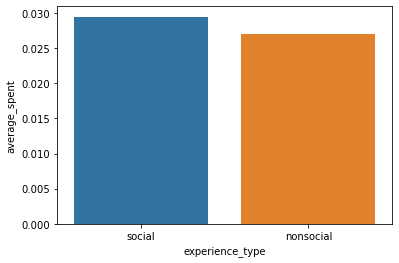

In [362]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'average_spent': [social_M, nonsocial_M]})

wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.average_spent, data=wtp_means)

In [363]:
#calculate effect size- cohens d

cohens_d = (mean(socialavg) - mean(nonsocialavg)) / (sqrt((stdev(socialavg) ** 2 + stdev(nonsocialavg) ** 2) / 2))

print(cohens_d)

0.4299074949087776


In [364]:
prop_social = wtpdata['prop_social']
aq = wtpdata.AQ #autism quotient
mspss = wtpdata.MSPSS #perceived social support

In [365]:
##### amount spent on social experiences // self report  ######

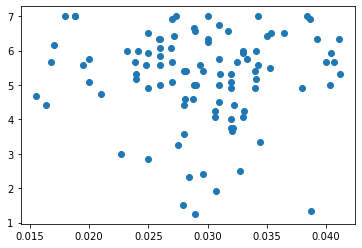

[[ 3.45180109e-05 -2.92061895e-04]
 [-2.92061895e-04  1.77894296e+00]]
Pearsons correlation: -0.037
p value: 0.7114
Accept null hypothesis that the means are equal.


In [366]:
#amount spent on social / mulitdimensional scale of perceived social support
pyplot.scatter(socialavg, mspss)
pyplot.show()
covariance = cov(socialavg, mspss)
print(covariance)
corr, _ = pearsonr(socialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

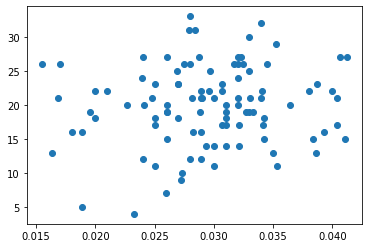

[[3.45180109e-05 4.12360030e-03]
 [4.12360030e-03 3.41900990e+01]]
Pearsons correlation: 0.120
p value: 0.2318
Accept null hypothesis that the means are equal.


In [367]:
## AQ

# social // aq
pyplot.scatter(socialavg, aq)
pyplot.show()
covariance = cov(socialavg, aq)
print(covariance)
corr, _ = pearsonr(socialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [368]:
##### prop of chosen social // self report #####

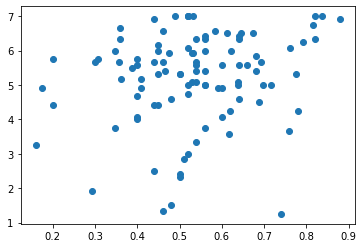

[[0.02200432 0.03863028]
 [0.03863028 1.77894296]]
Pearsons correlation: 0.195
p value: 0.0504
Reject the null hypothesis that the means are equal.


In [369]:
#prop of chosen social // MSPSS
pyplot.scatter(prop_social, mspss)
pyplot.show()
covariance = cov(prop_social, mspss)
print(covariance)
corr, _ = pearsonr(prop_social, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

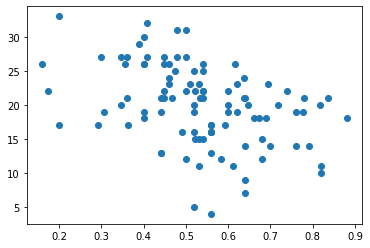

[[ 2.20043195e-02 -3.47379159e-01]
 [-3.47379159e-01  3.41900990e+01]]
Pearsons correlation: -0.400
p value: 0.0000
Reject the null hypothesis that the means are equal.


In [370]:
 # prop social // aq
pyplot.scatter(prop_social, aq)
pyplot.show()
covariance = cov(prop_social, aq)
print(covariance)
corr, _ = pearsonr(prop_social, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, aq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

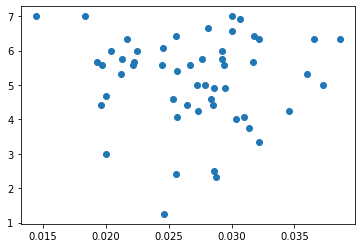

[[ 2.71980334e-05 -3.35552643e-04]
 [-3.35552643e-04  1.69141066e+00]]
Pearsons correlation: -0.049
p value: 0.7250
Accept null hypothesis that the means are equal.


In [324]:
##### avg spent on nonsocial // self report #####
# nonsocial // mspss (social support)
pyplot.scatter(nonsocialavg, mspss)
pyplot.show()
covariance = cov(nonsocialavg, mspss)
print(covariance)
corr, _ = pearsonr(nonsocialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    

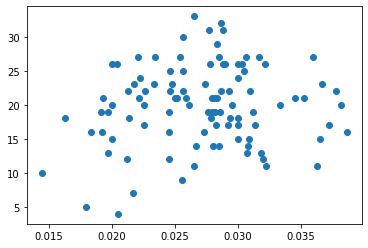

[[2.68139398e-05 3.83791099e-03]
 [3.83791099e-03 3.41900990e+01]]
Pearsons correlation: 0.127
p value: 0.2065
Accept null hypothesis that the means are equal.


In [371]:
# nonsocial // aq
pyplot.scatter(nonsocialavg, aq)
pyplot.show()
covariance = cov(nonsocialavg, aq)
print(covariance)
corr, _ = pearsonr(nonsocialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [372]:
######################################################################################################################

In [373]:
######################################################################################################################

In [374]:
## now just the last 52 subjects (excluding pilot data)

In [375]:
#import excel file containing data summary
wtpdata = pd.read_csv(r'wtp_subs_last53.csv',encoding='utf-8-sig')
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(wtpdata)



                 prolific_id  avg_spent_social  avg_spent_nonsocial  \
0   60a647cf71f87619eeed97ea          0.041111             0.036522   
1   5f248a2f46a10507b20d9f17          0.033000             0.025667   
2   5fbd2fffbbfb2d070580d353          0.028889             0.028125   
3   5d305152b2cfe00019231a2a          0.029600             0.025600   
4   57e972d7c3e5930001447bb1          0.030645             0.027368   
5   5f6ea39029ca174064215ac2          0.029630             0.025652   
6   60d86d6c0f4b31dab174a376          0.028750             0.025385   
7   60b0334a2e48ac0856f33161          0.020000             0.021333   
8   5e9a4b17666c130defb0ab72          0.028400             0.028800   
9   5f4ee0e82f0d6c12d692c29b          0.028125             0.028333   
10  604557dd82b57569031a1da8          0.029375             0.026667   
11  5cc166b25899270017dd60e2          0.032727             0.028571   
12  60dbf15243bf8d31a96ed803          0.039286             0.038636   
13  55

In [376]:
wtpdata['avg_spent_social'] = wtpdata['avg_spent_social'].astype(float)
wtpdata['avg_spent_nonsocial'] = wtpdata['avg_spent_nonsocial'].astype(float)
wtpdata.applymap(type)

,prolific_id,avg_spent_social,avg_spent_nonsocial,prop_social,AQ,MSPSS
0,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
1,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
2,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
3,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
4,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
5,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
6,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
7,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
8,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>
9,<class 'str'>,<class 'float'>,<class 'float'>,<class 'float'>,<class 'int'>,<class 'float'>


In [377]:
socialavg= wtpdata.avg_spent_social
#calculate group mean for av spent on social experiences
social_M = mean(socialavg)
print('group mean: %.12f'% (social_M))
print('standard error of the mean: %.12f'% (sem(socialavg)))

group mean: 0.029480716981
standard error of the mean: 0.000852383441


In [378]:
nonsocialavg = wtpdata.avg_spent_nonsocial
#calculate group mean for av spent on non-social experiences


nonsocial_M = mean(nonsocialavg)
print('group mean: %.12f'% (nonsocial_M))
print('standard error of the mean: %.12f'% (sem(nonsocialavg)))




group mean: 0.026991679245
standard error of the mean: 0.000716359157


In [379]:
#sample size
n = len(wtpdata)
print(n)

53


In [380]:
#Calculate STD
# sum squared difference between observations
d1 = sum([(socialavg[i]-nonsocialavg[i])**2 for i in range(n)])
# sum difference between observations
d2 = sum([socialavg[i]-nonsocialavg[i] for i in range(n)])
print(d1,d2)

# standard deviation of the difference between means
standev = np.sqrt((d1 - (d2**2 / n)) / (n - 1))
print(standev)

0.0008051738970000002 0.131919
0.003028145306709806


In [381]:
#calculate standard error of the difference between the means
sed = standev / np.sqrt(n)
print(sed)

0.00041594774704823486


In [382]:
# calculate the t statistic
t_stat = (social_M - nonsocial_M) / sed
print(t_stat)

5.984015428650513


In [383]:
# degrees of freedom
df = n - 1
print(df)
alpha= 0.05

52


In [384]:
# calculate the critical value
cv = t.ppf(1.0 - alpha, df)
# calculate the p-value
p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
# return everything
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')


t=5.984, df=52, cv=1.675, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


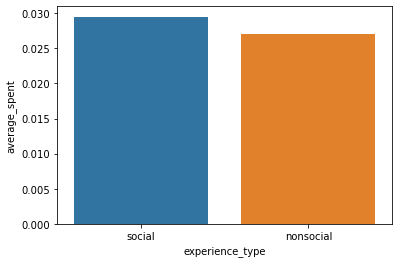

In [385]:
wtp_means = pd.DataFrame({'experience_type': ['social','nonsocial'], 'average_spent': [social_M, nonsocial_M]})

wtp_plot = sns.barplot(x=wtp_means.experience_type, y=wtp_means.average_spent, data=wtp_means)

In [386]:
#calculate effect size- cohens d

cohens_d = (mean(socialavg) - mean(nonsocialavg)) / (sqrt((stdev(socialavg) ** 2 + stdev(nonsocialavg) ** 2) / 2))

print(cohens_d)

0.43425551605356716


In [387]:
prop_social = wtpdata['prop_social']
aq = wtpdata.AQ #autism quotient
mspss = wtpdata.MSPSS #perceived social support


print(social_M)
print(nonsocial_M)
print(mean(aq))
print(mean(mspss))

0.029480716981132075
0.026991679245283017
19.88679245283019
5.147798742113207


In [388]:
##### amount spent on social experiences // self report  ######

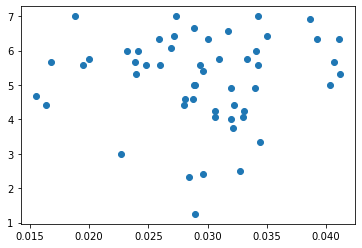

[[3.85075491e-05 1.89321480e-04]
 [1.89321480e-04 1.69141066e+00]]
Pearsons correlation: 0.023
p value: 0.8676
Accept null hypothesis that the means are equal.


In [389]:
#amount spent on social / mulitdimensional scale of perceived social support
pyplot.scatter(socialavg, mspss)
pyplot.show()
covariance = cov(socialavg, mspss)
print(covariance)
corr, _ = pearsonr(socialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

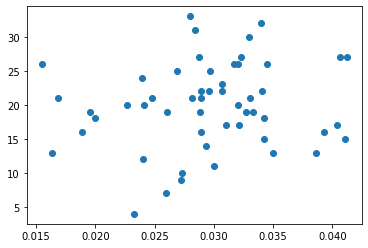

[[3.85075491e-05 5.55369811e-03]
 [5.55369811e-03 4.00253991e+01]]
Pearsons correlation: 0.141
p value: 0.3123
Accept null hypothesis that the means are equal.


In [390]:
## AQ

# social // aq
pyplot.scatter(socialavg, aq)
pyplot.show()
covariance = cov(socialavg, aq)
print(covariance)
corr, _ = pearsonr(socialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(socialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [391]:
##### prop of chosen social // self report #####

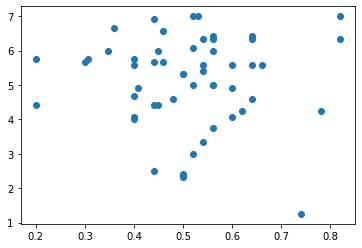

[[ 0.01721252 -0.00369052]
 [-0.00369052  1.69141066]]
Pearsons correlation: -0.022
p value: 0.8778
Accept null hypothesis that the means are equal.


In [392]:
#prop of chosen social // MSPSS
pyplot.scatter(prop_social, mspss)
pyplot.show()
covariance = cov(prop_social, mspss)
print(covariance)
corr, _ = pearsonr(prop_social, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

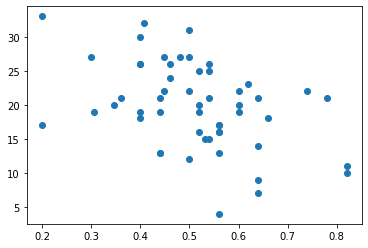

[[ 1.72125239e-02 -3.61056604e-01]
 [-3.61056604e-01  4.00253991e+01]]
Pearsons correlation: -0.435
p value: 0.0011
Reject the null hypothesis that the means are equal.


In [393]:
  # prop social // aq
pyplot.scatter(prop_social, aq)
pyplot.show()
covariance = cov(prop_social, aq)
print(covariance)
corr, _ = pearsonr(prop_social, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(prop_social, aq)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [394]:
##### avg spent on nonsocial // self report #####

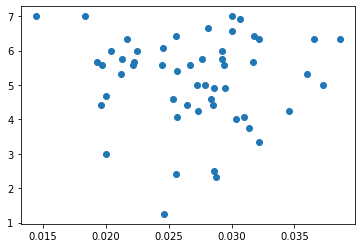

[[ 2.71980334e-05 -3.35552643e-04]
 [-3.35552643e-04  1.69141066e+00]]
Pearsons correlation: -0.049
p value: 0.7250
Accept null hypothesis that the means are equal.


In [395]:
# nonsocial // mspss (social support)
pyplot.scatter(nonsocialavg, mspss)
pyplot.show()
covariance = cov(nonsocialavg, mspss)
print(covariance)
corr, _ = pearsonr(nonsocialavg, mspss)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, mspss)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

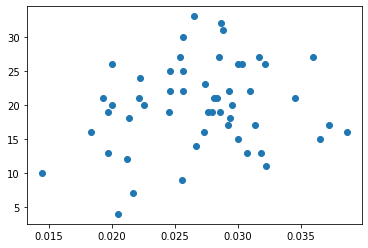

[[2.71980334e-05 5.82605914e-03]
 [5.82605914e-03 4.00253991e+01]]
Pearsons correlation: 0.177
p value: 0.2059
Accept null hypothesis that the means are equal.


In [396]:
# nonsocial // aq
pyplot.scatter(nonsocialavg, aq)
pyplot.show()
covariance = cov(nonsocialavg, aq)
print(covariance)
corr, _ = pearsonr(nonsocialavg, aq)
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(nonsocialavg, aq)
print('p value: %.4f' % p)
alpha = 0.10
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')